## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
cd_df = pd.merge (mouse_metadata,study_results, on='Mouse ID', how = 'inner')

# Display the data table for preview
cd_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouseid_count=cd_df['Mouse ID'].nunique()

#Number of mice Data Frame
nm = {'Number of Mice' : [mouseid_count]}
df = pd.DataFrame(data=nm)
df

,Number of Mice
0,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = cd_df.loc[cd_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False), ["Mouse ID","Timepoint"]]
duplicates

,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = cd_df.loc[cd_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False),cd_df.columns]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
c_df = cd_df[cd_df['Mouse ID']!= 'g989']
c_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

# Checking the number of mice.
mouseid_count=c_df['Mouse ID'].nunique()

#Number of mice Data Frame
nm = {'Number of Mice' : [mouseid_count]}
df = pd.DataFrame(data=nm)
df

,Number of Mice
0,248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
r_mean = c_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
r_median = c_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
r_var = c_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
r_std = c_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
r_sem = c_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
r_summary = pd.DataFrame({'Mean':r_mean, 
                        'Median':r_median,
                        'Variance':r_var,
                        'Standard Deviation':r_std,
                        'SEM':r_sem})

r_summary.style.format({'Mean':'{:.2f}', 
                        'Median':'{:.2f}', 
                        'Variance':'{:.2f}',
                        'Standard Deviation':'{:.2f}',
                        'SEM':'{:.2f}'})

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
ngb = c_df.groupby('Drug Regimen')
r_summary_two = ngb.agg(['mean', 'median', 'var', 'std','sem'])['Tumor Volume (mm3)']
r_summary_two.style.format({'mean':'{:.2f}', 
                        'median':'{:.2f}', 
                        'var':'{:.2f}',
                        'std':'{:.2f}',
                        'sem':'{:.2f}'})

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

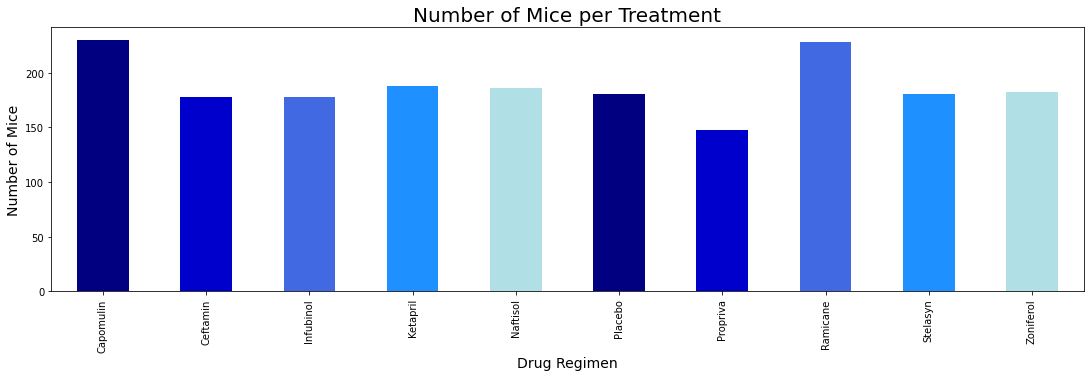

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# Groupby cmpt - count of mice per treatment
cmpt = c_df.groupby(['Drug Regimen']).count()['Mouse ID']

#Graphic bar
g_bar = cmpt.plot.bar(figsize = (15,5), color = ['navy', 'mediumblue', 'royalblue' ,'dodgerblue' ,'powderblue'])
plt.tight_layout()
plt.xlabel('Drug Regimen', fontsize = 14)
plt.ylabel('Number of Mice', fontsize = 14)
plt.title('Number of Mice per Treatment', fontsize = 20)
plt.show()

In [10]:
# Count of mice per treatment
cmpt

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0.5, 1.0, 'Number of Mice per Treatment')

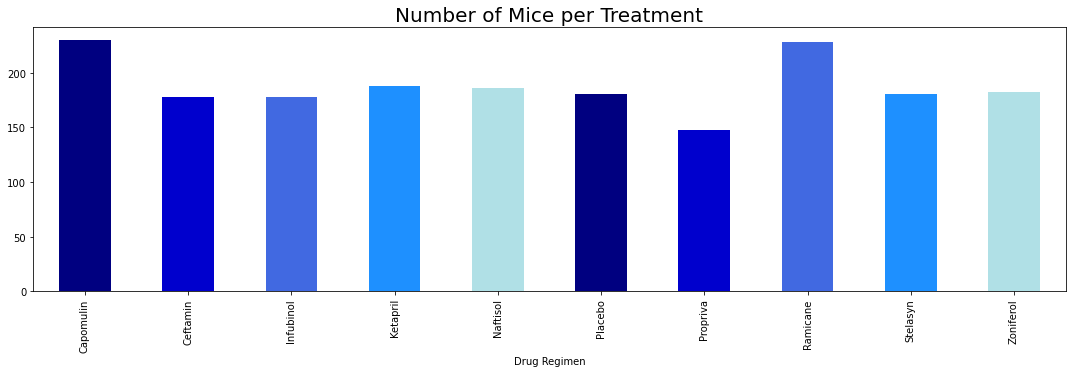

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
cmpt.plot.bar(x='Drug Regimen', y='Number of Mice', rot=90, figsize = (15,5), color = ['navy', 'mediumblue', 'royalblue' ,'dodgerblue' ,'powderblue'])
plt.tight_layout()
plt.title('Number of Mice per Treatment', fontsize = 20)

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
g_gender_df= c_df.groupby(['Sex']).count()['Mouse ID']
g_gender_df

df = pd.DataFrame(data=g_gender_df)
df

,Mouse ID
Sex,
Female,922
Male,958


Text(0.5, 1.0, 'Male vs Female Mouse Population')

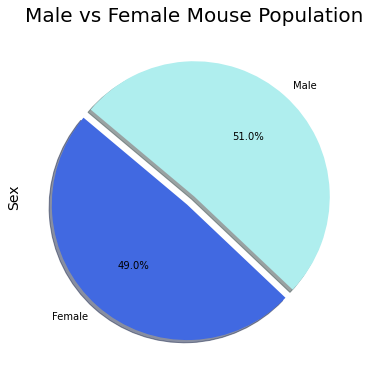

In [13]:
explode = (0.08,0)
g_gender_df.plot.pie(figsize=(13, 5),explode =explode,colors = ['royalblue','paleturquoise'], shadow = True, autopct='%1.1f%%',startangle=140)
plt.tight_layout()
plt.xlabel('', fontsize = 14)
plt.ylabel('Sex', fontsize = 14)
plt.title('Male vs Female Mouse Population', fontsize = 20)


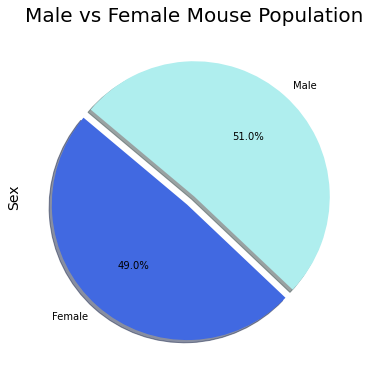

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
g_pie = g_gender_df.plot.pie(figsize=(13, 5),explode =explode,colors = ['royalblue','paleturquoise'], shadow = True, autopct='%1.1f%%',startangle=140)
plt.tight_layout()
plt.xlabel('', fontsize = 14)
plt.ylabel('Sex', fontsize = 14)
plt.title('Male vs Female Mouse Population', fontsize = 20)
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

tumor_df = c_df.groupby(['Drug Regimen']).max()['Tumor Volume (mm3)']
tumor_df

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Drug Regimen
Capomulin    48.158209
Ceftamin     68.923185
Infubinol    72.226731
Ketapril     78.567014
Naftisol     76.668817
Placebo      73.212939
Propriva     72.455421
Ramicane     47.622816
Stelasyn     75.123690
Zoniferol    73.324432
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
